In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Question 8 Wile E Coyote's Great Jump

### Part a) Euler Forward Scheme

done by hand

### Part b) Newton's Second law states $m \frac{d^2 z}{dt^2} = -mg $ Convert to a sytem of two first order equations then apply euler forward scheme. 

The two first order equations for position and velocity are

$\frac{dv}{dt} = -g $ and $\frac{dz}{dt}=-gt$

Applying the euler forward scheme gets us:

$v(h+t) = v(t) + hg $ and $z(h+t) = z(t) - htg$

The velocity and position codes are below as well as the energy plots

In [46]:
def velocity_euler_forward(g, v0, t0, tf, h):
    g = 9.8 #meters per second squared
    num_steps = int((tf-t0)/h)
    t_values = np.linspace(t0, tf, num_steps+1)
    v_values = np.zeros(num_steps + 1)
    v_values[0] = v0
    
    for i in range(num_steps):
        v_values[i+1] = v_values[i] + h * g
        
    return t_values, v_values

def position_euler_forward(g, z0, t0, tf, h):
    g = 9.8
    num_steps = int((tf-t0)/h)
    t_values = np.linspace(t0, tf, num_steps+1)
    z_values = np.zeros(num_steps + 1)
    z_values[0] = z0
    
    for i in range(num_steps):
        z_values[i+1] = z_values[i] - h * g * t_values[i]
        
    return t_values, z_values


In [47]:
#dv/dt = -g 
#the only acceleration comes from gravity

#now define initial conditions and our time interval
v0 = 0 #initial velocity is zero
t0 = 0 #initial time is zero
tf = 4.5 #lets say ten seconds 
h = 0.1 #lets set our step size as 0.1 seconds

#dz/dt = v 
#where v = np.sqrt(2g(z-z0))
#define initial conditions and time interval for the position case


z0 = 100 #initial height of wile e coyote is 100 meters
t0 = 0 #initial time is zero seconds
tf = 4.5 #lets say he's falling for ten seconds
h = 0.1 #lets set our step size as 0.1 seconds
g = 9.8



In [48]:
#now lets solve the velocity ODE using the euler forward function defined above

t_values, v_values = velocity_euler_forward(g, v0, t0, tf, h)

#now lets solve the position ODE using the euler forward function, replacing values for z

tz_values, z_values = position_euler_forward(g, z0, t0, tf, h)

#now lets solve the position second order


In [50]:
#energy plots

#lets assume his mass is 1kg

m = 1 #kilograms

pe = g * z_values
ke = 1/2 * (v_values)**2
T = pe + ke

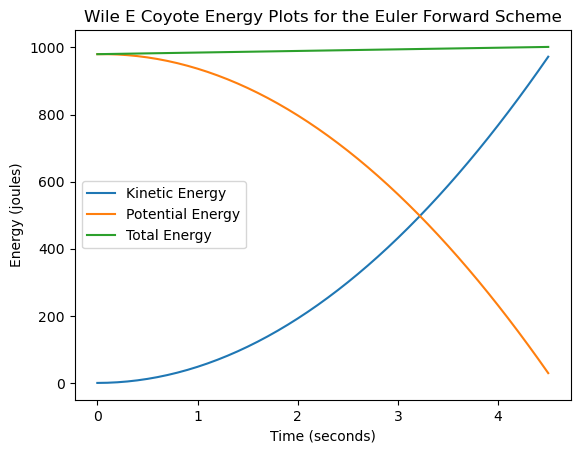

In [51]:
plt.plot(t_values, ke, label= 'Kinetic Energy')
plt.plot(tz_values, pe, label = 'Potential Energy')
plt.plot(t_values, T, label='Total Energy')
plt.title('Wile E Coyote Energy Plots for the Euler Forward Scheme')
plt.xlabel('Time (seconds)')
plt.ylabel('Energy (joules)')
plt.legend()

### Problem 5c) Use the leapfrog scheme 

$v(t+\Delta{t}) = v(t-\Delta{t}) + 2\Delta{t}g$
and 
$z(t+2\Delta{t}) = z(t) + 2\Delta{t}v(t+\Delta{t})$

assume $v=0$ at $t=\Delta{t}$ and $z=0$ at $t=0$

Make plots of kinetic, potential, and total energies

In [58]:
def leapfrog(g, v0, t0, tf, h):
    g = 9.8 #meters per second squared
    num_steps = int((tf-t0)/h)
    t_values = np.linspace(t0, tf, num_steps+1)
    v_values = np.zeros(num_steps + 1)
    v_values[0] = v0
    z_values[0] = 0
    
    
    for i in range(1, num_steps+1):
        v_values[i] = v_values[i-1] + 2*h * g
        z_values[i] = z_values[i-1] + 2*h * v_values[i]
        
    return t_values, z_values, v_values

In [59]:
#now define initial conditions and our time interval

v0 = 0 #initial velocity is zero because v=0 at t=-h
z0 = 0 #initial height of wile e coyote is 100 meters
t0 = 0 #initial time is zero seconds
tf = 4.5 #lets say he's falling for ten seconds
h = 0.1 #lets set our step size as 0.1 seconds
g = 9.8


In [60]:
t, z, v = leapfrog(g, v0, t0, tf, h)

In [61]:
#energy plots

#lets assume his mass is 1kg

m = 1 #kilograms

pe_FROG = -g * z
ke_FROG = 1/2 * (v)**2
TE = pe_FROG + ke_FROG

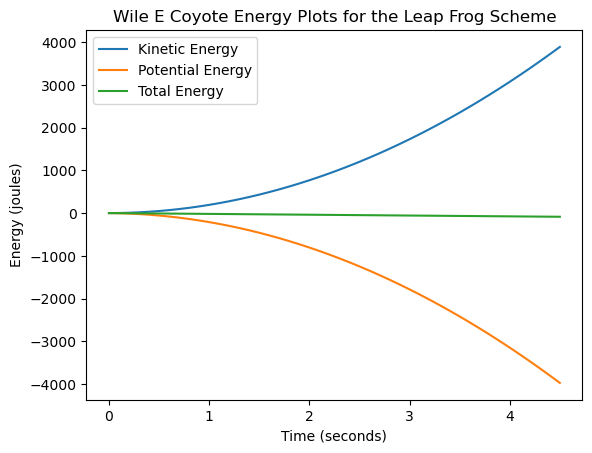

In [62]:
plt.plot(t, ke_FROG, label= 'Kinetic Energy')
plt.plot(t, pe_FROG, label = 'Potential Energy')
plt.plot(t, TE, label = 'Total Energy')
plt.title('Wile E Coyote Energy Plots for the Leap Frog Scheme')
plt.xlabel('Time (seconds)')
plt.ylabel('Energy (joules)')
plt.legend()